In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data = pd.read_csv('../sql/K6_UNEMPLOYED_RESIDENTS_BY_MARITAL_STATUS_AND_SEX.csv')
data = pd.read_csv('../sql/K15T_UNEMPLOYED_RESIDENTS_BY_PREVIOUS_OCCUPATION_AND_SEX.csv')

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Occupation  19 non-null     object 
 1   2014        18 non-null     float64
 2   2015        18 non-null     float64
 3   2016        18 non-null     float64
 4   2017        18 non-null     float64
 5   2018        19 non-null     float64
 6   2019        19 non-null     float64
 7   2020        19 non-null     float64
 8   2021        19 non-null     float64
 9   2022        18 non-null     float64
 10  2023        18 non-null     float64
 11  2024        19 non-null     float64
 12  Gender      19 non-null     object 
 13  Group       19 non-null     object 
 14  Status      19 non-null     object 
dtypes: float64(11), object(4)
memory usage: 2.4+ KB


In [125]:
data.nunique()

# Drop columns with only 1 unique value
col_only_single_unique = [col for col in data.columns if data[col].nunique()==1]
data.drop(col_only_single_unique, axis =1, inplace = True)
data.head()

,Occupation,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Gender
0,Managers & Administrators (Including Working P...,6.1,5.6,7.4,6.7,6.0,5.5,5.3,7.2,6.4,3.5,7.4,Male
1,Professionals,4.9,5.2,6.7,6.1,7.6,5.8,10.3,10.7,9.4,9.6,7.9,Male
2,Associate Professionals & Technicians,6.3,7.5,7.2,7.7,7.2,8.7,11.3,9.8,6.2,7.2,8.8,Male
3,Clerical Support Workers,4.3,4.5,4.5,4.7,3.7,4.8,5.0,4.6,3.5,3.0,3.1,Male
4,Service & Sales Workers,6.5,7.4,5.9,7.8,5.8,7.4,8.2,7.0,5.4,4.2,4.5,Male


In [126]:
## Convert to long form

cat_list = [col for col in data.columns if data[col].dtype == object]

df_long = data.melt(
    id_vars=cat_list,
    value_vars=[str(year) for year in range(2014, 2025)],
    var_name="Year",
    value_name="Count"
)
df_long.head()

,Occupation,Gender,Year,Count
0,Managers & Administrators (Including Working P...,Male,2014,6.1
1,Professionals,Male,2014,4.9
2,Associate Professionals & Technicians,Male,2014,6.3
3,Clerical Support Workers,Male,2014,4.3
4,Service & Sales Workers,Male,2014,6.5


### Univariate Analysis (Single Variable)

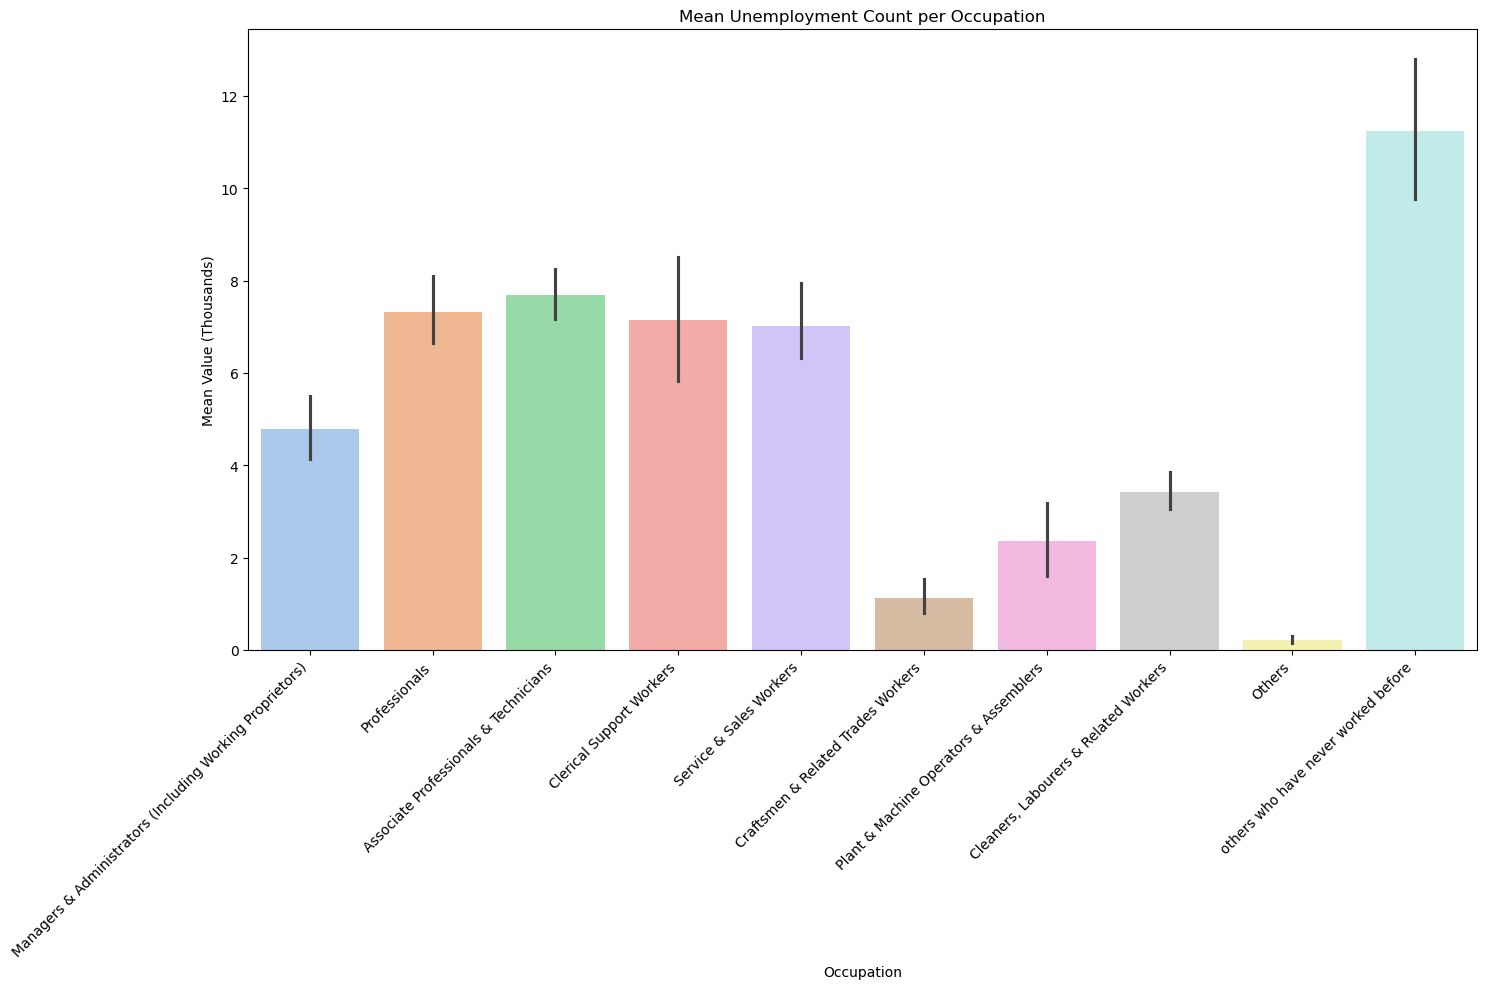

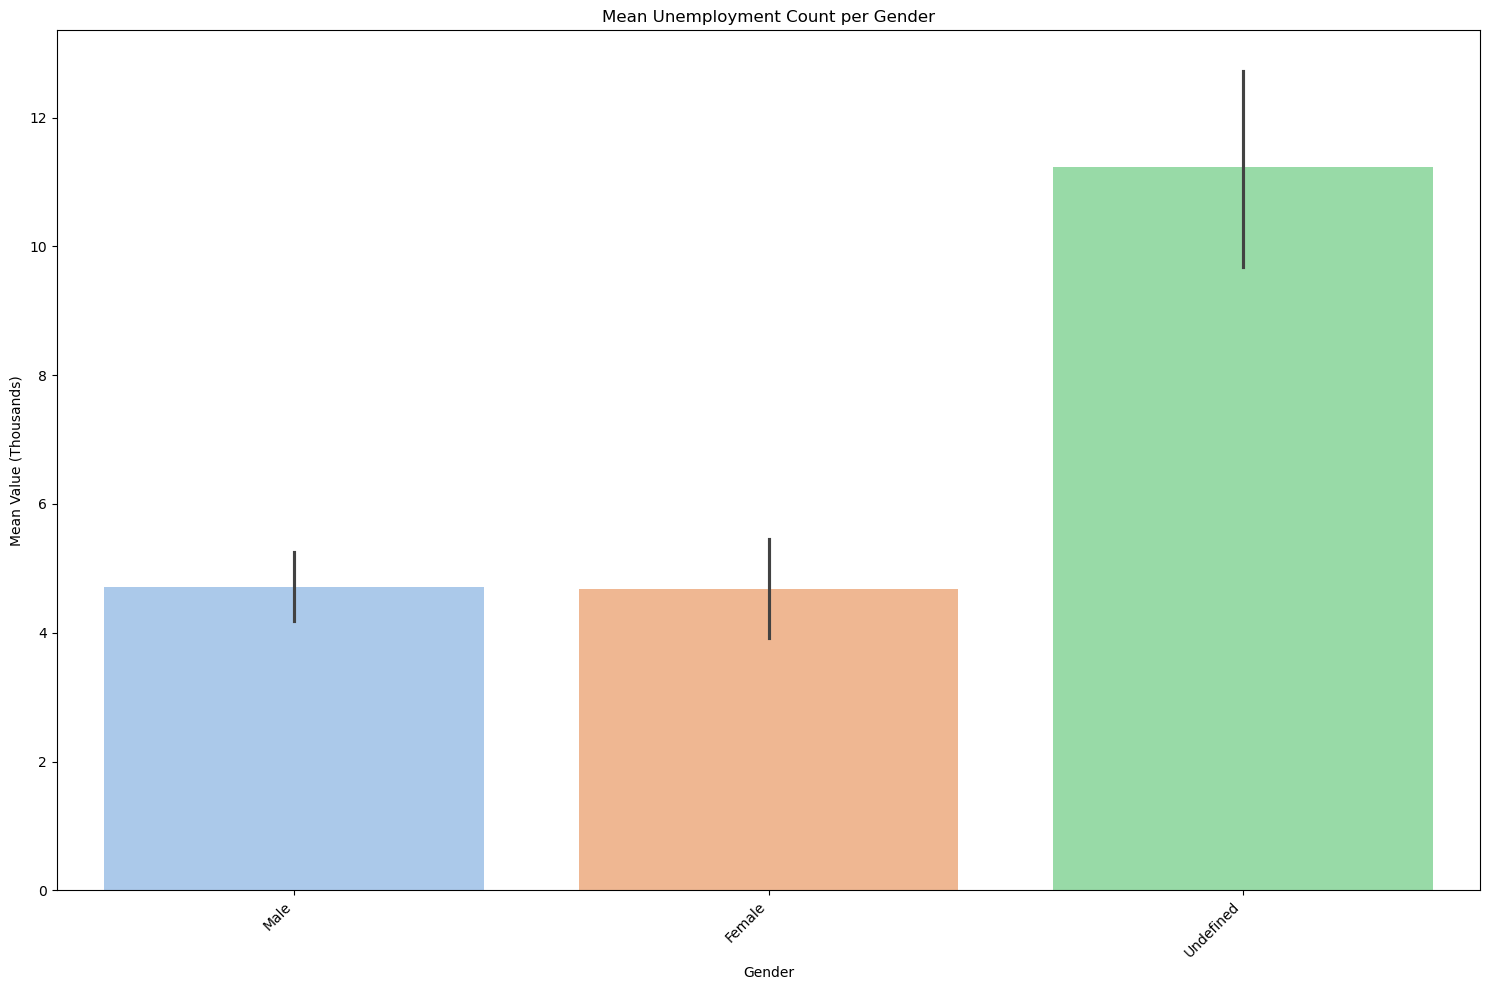

In [127]:
for col in cat_list:
    # y-axis to be Count

    ###-------------------------------------------------------------------####
    ### ---- Bar Plot – For categorical variables (mean of numerical) --- ####
    ###-------------------------------------------------------------------####
    plt.figure(figsize=(15, 10))
    sns.barplot(x=col, y='Count', hue=col, data=df_long, estimator='mean', palette='pastel' , legend=False)
    plt.title(f"Mean Unemployment Count per {col}")
    plt.xlabel(col)
    plt.ylabel("Mean Value (Thousands)")

    # Rotate x-axis labels
    plt.xticks(rotation=45, ha='right')  
    plt.tight_layout()
    plt.show()


### Bivariate Analysis (Two Variables)

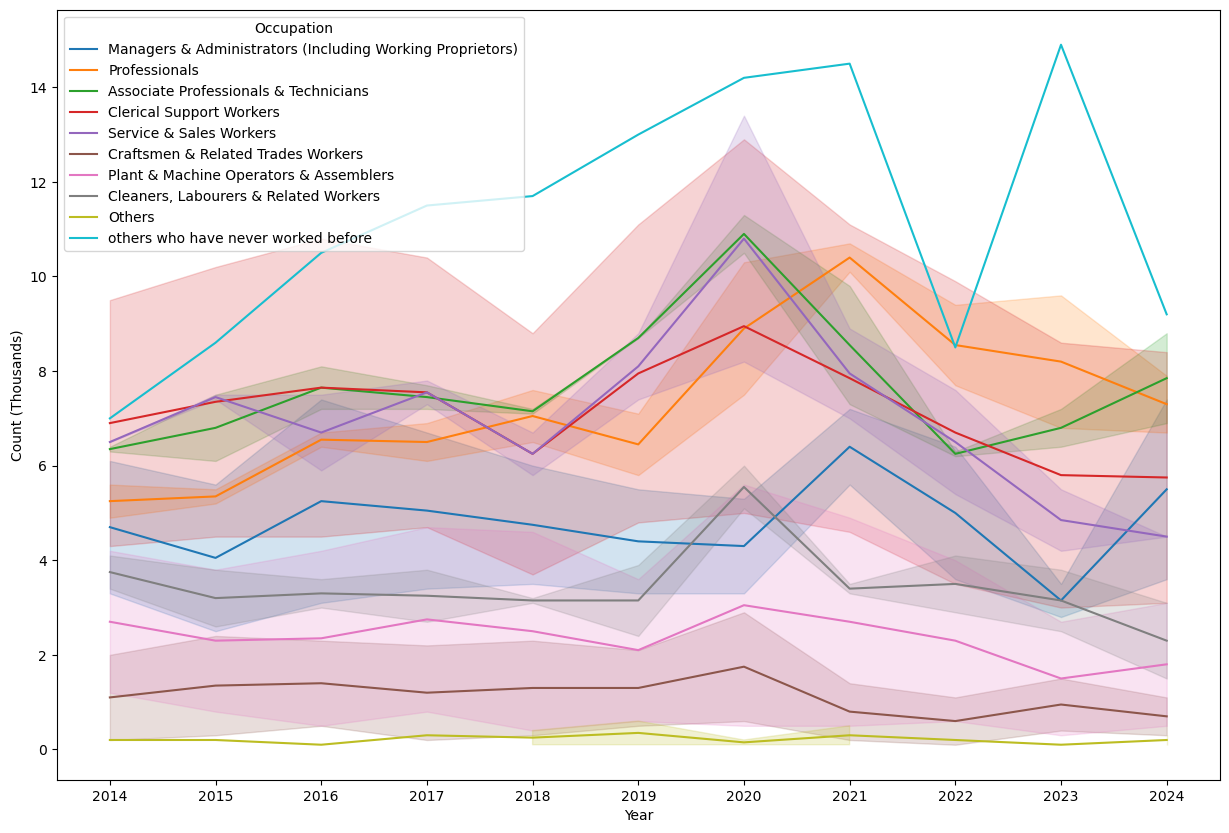

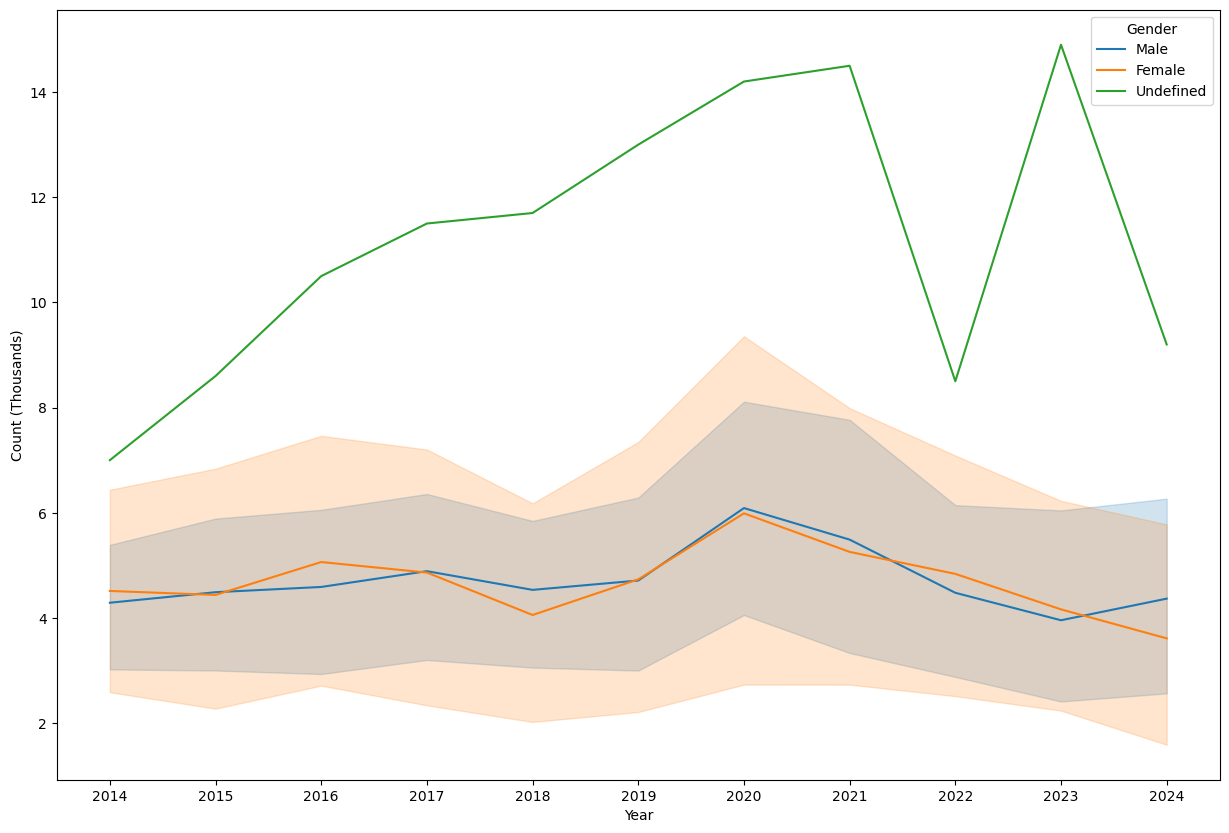

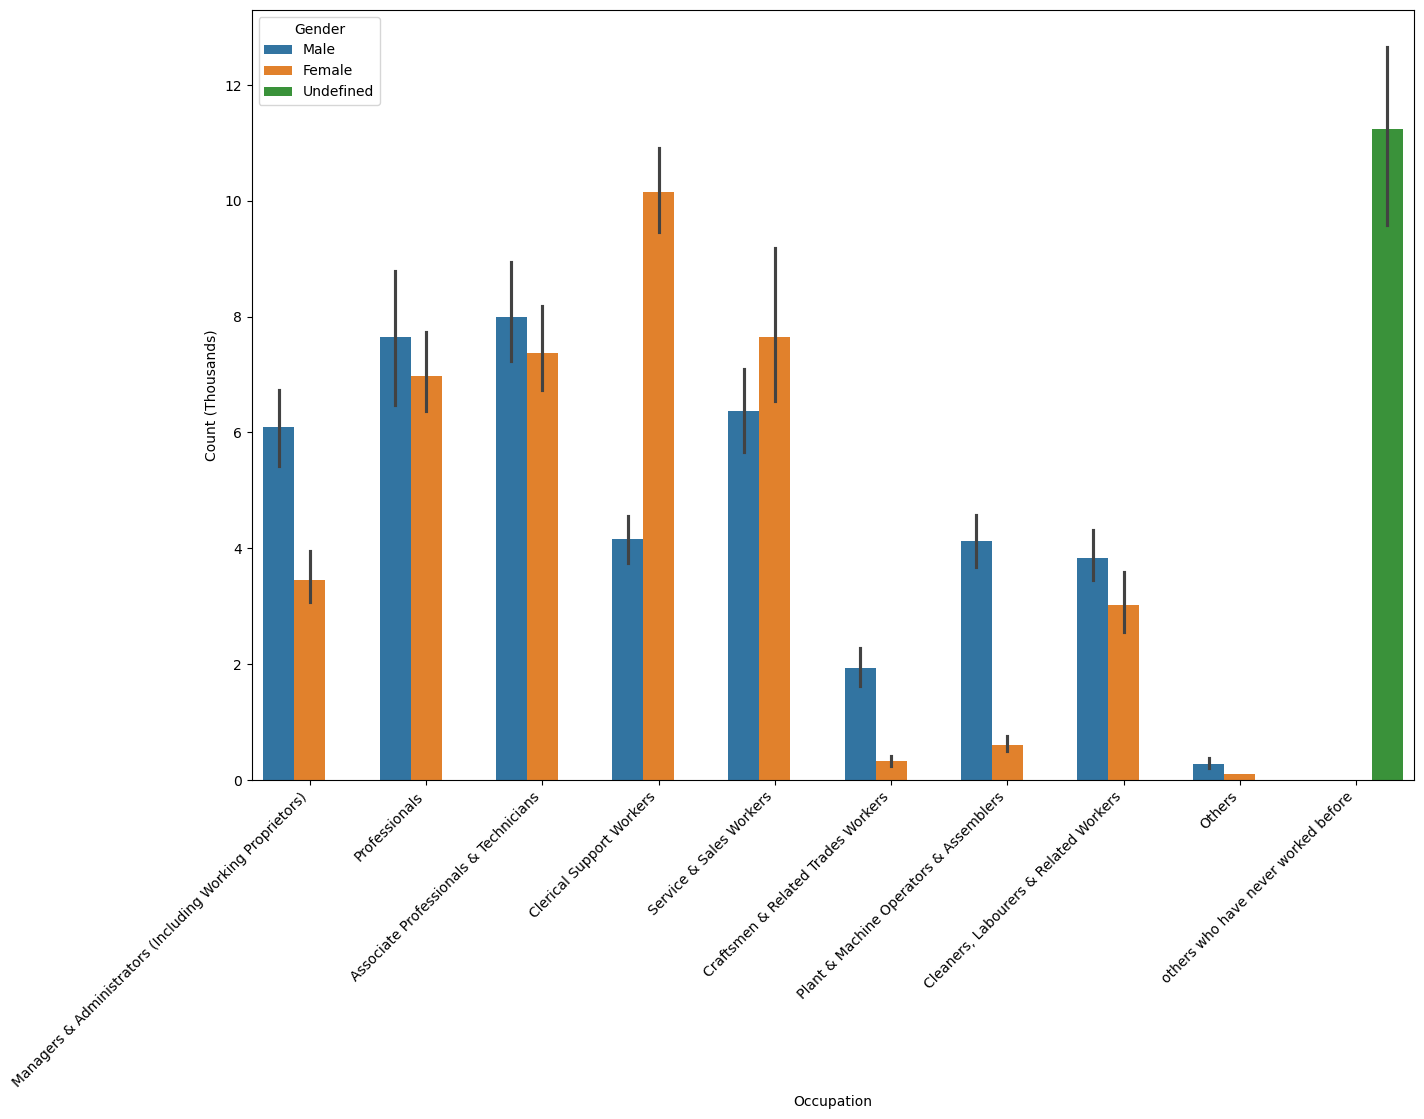

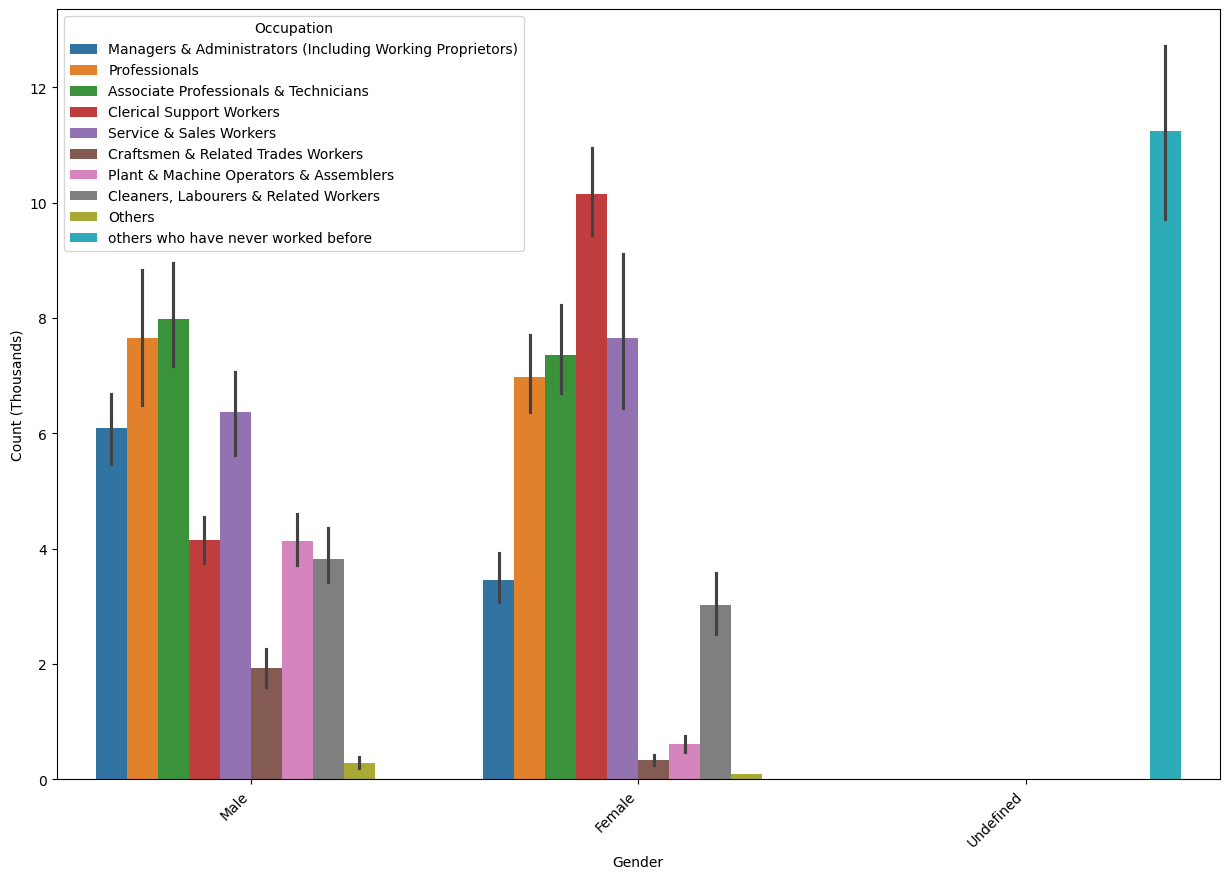

In [128]:
for i, col in enumerate(cat_list):
    # x-axis to be Year
    # y-axis to be Count

    plt.figure(figsize=(15, 10))
    sns.lineplot(x='Year', y='Count', hue=col, data=df_long, estimator='mean')
    plt.xlabel('Year')
    plt.ylabel("Count (Thousands)")
    plt.show()

    if i != 0:
        plt.figure(figsize=(15, 10))
        sns.barplot(x=col_previous, y='Count', hue=col, data=df_long, estimator='mean')
        plt.xticks(rotation=45, ha='right')
        plt.xlabel(col_previous)
        plt.ylabel("Count (Thousands)")
        plt.show()

        plt.figure(figsize=(15, 10))
        sns.barplot(x=col, y='Count', hue=col_previous, data=df_long, estimator='mean')
        plt.xticks(rotation=45, ha='right')
        plt.xlabel(col)
        plt.ylabel("Count (Thousands)")
        plt.show()

    col_previous = col 


### Multivariate Analysis